# Customer Churn Prediction

### Import Libraries

In [ ]:
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Load dataset

In [5]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Domain analysis

Objective: Predict if a customer will churn based on various factors. there are 21 columns 

### Basic Checks

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### There is no **NULL** values in the dataset, but there are multiple **Datatypes**, mainly categorical, which will require encoding and scaling before model training

In [8]:
data.shape

(7043, 21)

##### There are **7043** rows and **21** columns

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# EDA

In [13]:
sns.set_theme(style='whitegrid')

<Axes: xlabel='Churn'>

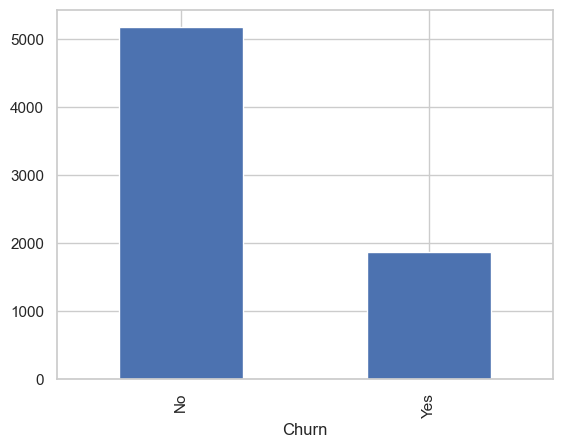

In [14]:
data['Churn'].value_counts().plot(kind='bar')

##### The target variable shows a class imbalance, which will be considered during model evaluation.

<Axes: title={'center': 'tenure'}, xlabel='Churn'>

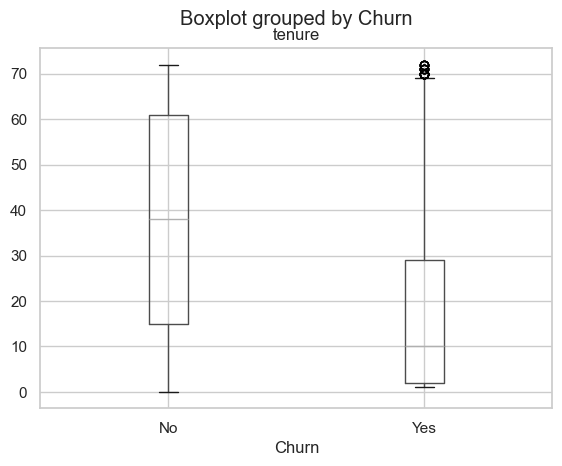

In [17]:
data.boxplot(column='tenure', by='Churn')

##### Customers who churn tend to have significantly shorter tenure compared to retained customers

<Axes: title={'center': 'MonthlyCharges'}, xlabel='Churn'>

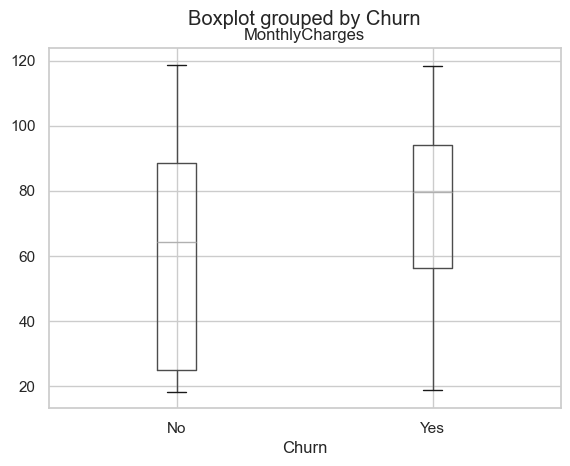

In [16]:
data.boxplot(column='MonthlyCharges', by='Churn')

##### Churned customers tend to have higher monthly charges, indicating that pricing may contribute to churn behavior

<Axes: xlabel='Contract'>

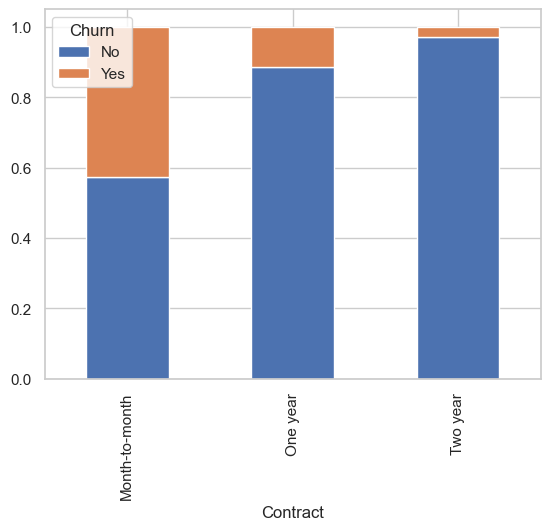

In [18]:
pd.crosstab(data['Contract'], data['Churn'], normalize='index').plot(kind='bar', stacked=True)

##### Month-to-month contracts exhibit the highest churn rate, while one-year and two-year contracts show significantly better customer retention

<Axes: >

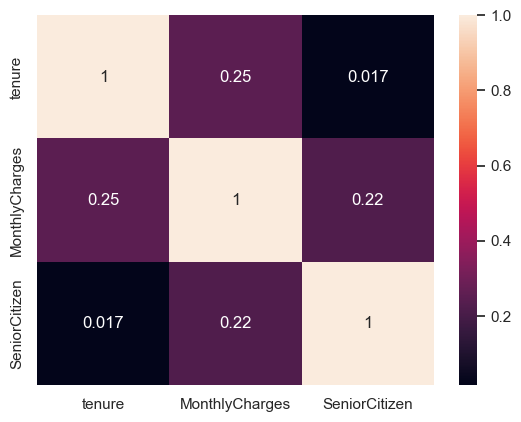

In [19]:
sns.heatmap(data[['tenure','MonthlyCharges','SeniorCitizen']].corr(), annot=True)

##### The numerical features show low to moderate correlations, with no evidence of strong multicollinearity

# Data Preprocessing

### Target and Feature separation

In [20]:
X = data.drop(columns=["Churn", "customerID"])
y = data["Churn"]

In [21]:
X.shape, y.shape

((7043, 19), (7043,))

### Identifying Numerical and Categorical Features

In [27]:
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()

num_cols, cat_cols

(['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'])

#### Train-Test-Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=99,
    stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

### Preprocessing

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

### Fit and Transform

In [32]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((5634, 5316), (1409, 5316))

# Model Training

### Baseline Model: Logistic Regression

In [33]:
# Baseline model
lr = LogisticRegression(max_iter=1000)

# Train model
lr.fit(X_train_processed, y_train)


lr.score(X_test_processed, y_test)

0.8041163946061036

# Model Evaluation

### Confusion Matrix and Classification Report

In [35]:
# Predictions
y_pred = lr.predict(X_test_processed)

# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[938,  97],
       [179, 195]])

TN = 938

FP = 97

FN = 179

TP = 195

### Classification Report

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1035
         Yes       0.67      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



##### Interpretation of Results

For churn prediction, the primary focus is on the **churn class (Yes)** rather than overall accuracy.

The model shows strong performance for the non-churn class (No), but lower recall and F1-score for the churn class (Yes).
This indicates that a portion of churned customers are not correctly identified.

Therefore, **recall and F1-score for the churn class are more relevant metrics** than accuracy, as missing churned customers has a higher business cost.


# Second Model: Random Forest

### Random Forest Training

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train model
rf.fit(X_train_processed, y_train)

# Accuracy on test set
rf.score(X_test_processed, y_test)